### Preprocesamiento2
### IPN- CIC
### Alumno: Jorge Diego García Torres
#### Titulo : Clasificación de los grados de retinopatía diabética en imágenes del fondo del ojo mediante algoritmos de aprendizaje profundo.

In [1]:
import os, os.path

DIR = 'test_images/'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))


DIR2 = 'train_images/'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

FileNotFoundError: [Errno 2] No such file or directory: 'test_images/'

In [5]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()

(3662, 2)
(1928, 1)


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [20]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [1]:
from PIL import Image

def resize(image_pil, width, height):

    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:

        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:

        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0, 0, 0, 0)) #fondo negro o blanco
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [2]:
def preprocess_image(image_path, desired_size=224):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im

In [9]:
trainlist = train_df['id_code'].values

In [17]:
testlist = test_df['id_code'].values

In [18]:
print(testlist)

['0005cfc8afb6' '003f0afdcd15' '006efc72b638' ... 'ff64897ac0d8'
 'ffa73465b705' 'ffdc2152d455']


In [10]:
print(trainlist)

['000c1434d8d7' '001639a390f0' '0024cdab0c1e' ... 'ffcf7b45f213'
 'ffd97f8cd5aa' 'ffec9a18a3ce']


In [22]:
from tqdm import tqdm
import os

DIR = 'test_images'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'test_images_aug1' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG = 224  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for names in tqdm(testlist):
    img = Image.open(DIR+'/'+names+'.png')
    img= resize(img,IMG,IMG)  # Se puede cambiar el tamaño del resize
    img.save(DIR2+'/'+names+'.png')
    
    #img = preprocess_image(DIR+'/'+names+'.png')
    #img.save(DIR2+'/'+names+'.png')
    



 16%|█▌        | 303/1928 [02:22<16:18,  1.66it/s]


 32%|███▏      | 608/1928 [04:15<03:43,  5.91it/s]


 47%|████▋     | 911/1928 [06:36<08:10,  2.07it/s]


 63%|██████▎   | 1210/1928 [08:54<07:38,  1.56it/s]


 78%|███████▊  | 1507/1928 [11:08<02:10,  3.24it/s]


 94%|█████████▎| 1803/1928 [13:36<01:13,  1.70it/s]


100%|██████████| 1928/1928 [14:24<00:00,  2.23it/s]


In [23]:
ylist =train_df['diagnosis'].values

In [25]:
ylist.shape

(3662,)

In [26]:
len(trainlist)

3662

In [31]:
import random 
import shutil

DIR2 = 'ctrain_images_aug1' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterio
newDir = 'ctrain_images_aug1/'

for i in tqdm(range(len(trainlist))):
    shutil.copy2(DIR2+'/'+trainlist[i]+'.png',newDir+str(ylist[i]))
    os.remove(DIR2+'/'+trainlist[i]+'.png')




  0%|          | 0/3662 [00:00<?, ?it/s]

  0%|          | 6/3662 [00:00<01:06, 55.22it/s]

  0%|          | 11/3662 [00:00<01:11, 50.81it/s]

  0%|          | 17/3662 [00:00<01:08, 53.04it/s]

  1%|          | 21/3662 [00:00<01:32, 39.27it/s]

  1%|          | 25/3662 [00:00<01:42, 35.47it/s]

  1%|          | 29/3662 [00:00<01:48, 33.35it/s]

  1%|          | 35/3662 [00:00<01:37, 37.13it/s]

  1%|          | 40/3662 [00:01<01:40, 35.88it/s]

  1%|          | 45/3662 [00:01<01:40, 36.01it/s]

  1%|▏         | 50/3662 [00:01<01:35, 37.99it/s]

  1%|▏         | 54/3662 [00:01<01:49, 33.07it/s]

  2%|▏         | 58/3662 [00:01<01:45, 34.08it/s]

  2%|▏         | 65/3662 [00:01<01:30, 39.94it/s]

  2%|▏         | 70/3662 [00:01<01:27, 40.86it/s]

  2%|▏         | 75/3662 [00:01<01:23, 43.21it/s]

  2%|▏         | 80/3662 [00:02<01:35, 37.36it/s]

  2%|▏         | 86/3662 [00:02<01:26, 41.55it/s]

  2%|▏         | 91/3662 [00:02<01:30, 39.51it/s]

  3%|▎         | 96/3662 [00:02<01:25, 

 37%|███▋      | 1354/3662 [00:38<01:49, 21.14it/s]

 37%|███▋      | 1357/3662 [00:38<01:47, 21.38it/s]

 37%|███▋      | 1360/3662 [00:38<01:51, 20.71it/s]

 37%|███▋      | 1363/3662 [00:38<01:52, 20.35it/s]

 37%|███▋      | 1366/3662 [00:38<01:44, 22.01it/s]

 37%|███▋      | 1370/3662 [00:38<01:40, 22.76it/s]

 37%|███▋      | 1373/3662 [00:38<01:43, 22.11it/s]

 38%|███▊      | 1376/3662 [00:39<01:47, 21.19it/s]

 38%|███▊      | 1379/3662 [00:39<01:38, 23.18it/s]

 38%|███▊      | 1383/3662 [00:39<01:27, 26.17it/s]

 38%|███▊      | 1386/3662 [00:39<01:29, 25.39it/s]

 38%|███▊      | 1389/3662 [00:39<01:36, 23.49it/s]

 38%|███▊      | 1392/3662 [00:39<01:43, 22.03it/s]

 38%|███▊      | 1395/3662 [00:39<01:38, 22.93it/s]

 38%|███▊      | 1398/3662 [00:40<02:01, 18.59it/s]

 38%|███▊      | 1401/3662 [00:40<01:50, 20.51it/s]

 38%|███▊      | 1404/3662 [00:40<01:49, 20.58it/s]

 38%|███▊      | 1407/3662 [00:40<01:44, 21.58it/s]

 39%|███▊      | 1410/3662 [00:40<01:43, 21.65

 60%|██████    | 2204/3662 [01:17<00:59, 24.33it/s]

 60%|██████    | 2208/3662 [01:17<00:57, 25.09it/s]

 60%|██████    | 2211/3662 [01:17<01:04, 22.61it/s]

 60%|██████    | 2214/3662 [01:17<01:02, 23.29it/s]

 61%|██████    | 2217/3662 [01:17<01:03, 22.77it/s]

 61%|██████    | 2220/3662 [01:18<01:11, 20.24it/s]

 61%|██████    | 2223/3662 [01:18<01:09, 20.64it/s]

 61%|██████    | 2226/3662 [01:18<01:03, 22.46it/s]

 61%|██████    | 2229/3662 [01:18<01:07, 21.22it/s]

 61%|██████    | 2232/3662 [01:18<01:06, 21.36it/s]

 61%|██████    | 2235/3662 [01:18<01:08, 20.82it/s]

 61%|██████    | 2239/3662 [01:18<01:02, 22.88it/s]

 61%|██████    | 2242/3662 [01:19<00:59, 24.04it/s]

 61%|██████▏   | 2245/3662 [01:19<01:00, 23.35it/s]

 61%|██████▏   | 2248/3662 [01:19<01:03, 22.20it/s]

 61%|██████▏   | 2251/3662 [01:19<01:01, 22.90it/s]

 62%|██████▏   | 2254/3662 [01:19<01:03, 22.34it/s]

 62%|██████▏   | 2257/3662 [01:19<01:08, 20.38it/s]

 62%|██████▏   | 2260/3662 [01:19<01:10, 19.82

 82%|████████▏ | 3008/3662 [01:56<00:20, 32.55it/s]

 82%|████████▏ | 3012/3662 [01:56<00:19, 33.95it/s]

 82%|████████▏ | 3016/3662 [01:57<00:21, 30.39it/s]

 82%|████████▏ | 3020/3662 [01:57<00:24, 25.94it/s]

 83%|████████▎ | 3025/3662 [01:57<00:21, 30.29it/s]

 83%|████████▎ | 3029/3662 [01:57<00:22, 28.63it/s]

 83%|████████▎ | 3033/3662 [01:57<00:21, 29.80it/s]

 83%|████████▎ | 3040/3662 [01:57<00:17, 35.84it/s]

 83%|████████▎ | 3045/3662 [01:57<00:17, 34.30it/s]

 83%|████████▎ | 3050/3662 [01:58<00:17, 35.97it/s]

 83%|████████▎ | 3057/3662 [01:58<00:14, 41.06it/s]

 84%|████████▎ | 3062/3662 [01:58<00:15, 39.07it/s]

 84%|████████▍ | 3067/3662 [01:58<00:15, 39.51it/s]

 84%|████████▍ | 3072/3662 [01:58<00:16, 36.40it/s]

 84%|████████▍ | 3076/3662 [01:58<00:16, 35.52it/s]

 84%|████████▍ | 3080/3662 [01:58<00:16, 36.22it/s]

 84%|████████▍ | 3087/3662 [01:58<00:14, 39.79it/s]

 84%|████████▍ | 3092/3662 [01:59<00:15, 36.66it/s]

 85%|████████▍ | 3097/3662 [01:59<00:14, 38.93

In [32]:
train_df['diagnosis'].hist()
train_df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [35]:
3662*.10

366.20000000000005

In [37]:
366/5

73.2

In [43]:
import random 
import shutil

DIR1 = 'cctrain_images_aug1' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterio
DIR2 = 'ctest_images_aug1'

target_names = ['0','1','2','3','4']

for names in target_names:
    oldDir = DIR1 +'/'+ names
    newDir = DIR2 +'/'+ names
    files = []
    for file in tqdm(os.listdir(oldDir)):
        if (str(file).startswith('._')!= True):
            files.append(file)
            lenfiles = len(files)
            selected = int(lenfiles*.10)

    for to_copy in random.sample(files, selected):
        shutil.copy2(oldDir+'/'+to_copy,newDir)
        os.remove(oldDir+'/'+to_copy)



100%|██████████| 1805/1805 [00:00<00:00, 216324.79it/s]


100%|██████████| 370/370 [00:00<00:00, 76256.33it/s]


100%|██████████| 999/999 [00:00<00:00, 62730.89it/s]


100%|██████████| 193/193 [00:00<00:00, 260205.94it/s]


100%|██████████| 296/296 [00:00<00:00, 203861.08it/s]


In [40]:
DIR = 'ctest_images_aug'
target_names = ['0','1','2','3','4']


for names in target_names:
    newDir = DIR +'/'+ names
    for file in tqdm(os.listdir(newDir)):
            os.remove(newDir+'/'+file)



100%|██████████| 73/73 [00:00<00:00, 8186.74it/s]


100%|██████████| 73/73 [00:00<00:00, 9138.74it/s]


100%|██████████| 73/73 [00:00<00:00, 10754.63it/s]


100%|██████████| 73/73 [00:00<00:00, 7340.26it/s]


100%|██████████| 73/73 [00:00<00:00, 8703.85it/s]


In [115]:
DIR = 'ctest_images_aug/4'
print( len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

320


In [1]:
# aumentar datos 

# -rotacion
# -intensidad
# -correcion factor gamma
# -flip
# -blur
# - ruido aleatorio 


import os
import random
from scipy import ndarray
import numpy as np

# Librerias de preprocesamiento
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from scipy import ndimage
from skimage import exposure


random.seed(777)

def random_rotation(image_array: ndarray):
    #Rotación aleatoria
    return sk.transform.rotate(image_array, 15)

def random_rotation1(image_array: ndarray):
    # Rotacion de 75 grados
    return sk.transform.rotate(image_array, 75)

def random_rotation2(image_array: ndarray):
    # Rotacion de -45 grados
    return sk.transform.rotate(image_array, -45)

def random_rotation3(image_array: ndarray):
    # rotacion de 90 grados
    return sk.transform.rotate(image_array, 90)

def random_rotation4(image_array: ndarray):
    # rotacion de 90 grados
    return sk.transform.rotate(image_array, 30)

def random_rotation4(image_array: ndarray):
    # rotacion de 90 grados
    return sk.transform.rotate(image_array, 60)

def random_rotation5(image_array: ndarray):
    # rotacion de 90 grados
    return sk.transform.rotate(image_array, 105)

def random_rotation6(image_array: ndarray):
    # rotacion de 90 grados
    return sk.transform.rotate(image_array, 120)


def random_rotation7(image_array: ndarray):
    # rotacion de 90 grados
    return sk.transform.rotate(image_array, 135)

def intensity(image_array: ndarray):
    v_min, v_max = np.percentile(image_array, (0.2, 99.8))
    return exposure.rescale_intensity(image_array, in_range=(v_min, v_max))

def gamma(image_array: ndarray):
    return exposure.adjust_gamma(image_array, gamma=0.4, gain=0.9)

def random_noise(image_array: ndarray):
    # ruido aleatorio
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    return image_array[:, ::-1]

def vertical_flip(image_array: ndarray):
    return image_array[::-1, :]

def blured(image_array: ndarray):
    return ndimage.uniform_filter(image_array, size=(11, 11, 1))


# diccionario de transformaciones
available_transformations = {
    'rotate': random_rotation,
    #'noise': random_noise,
    'horizontal_flip': horizontal_flip,
    #'intensity3':intensity,
    #'blured3':blured,
    'rotate1': random_rotation1,
    #'gamma2':gamma,
    'rotate2': random_rotation2,
    'rotate3': random_rotation3,
    'rotate4': random_rotation4,
    'rotate5': random_rotation5,
    'rotate6': random_rotation3,
    'rotate7': random_rotation3,
    'horizontal_flip3': horizontal_flip,
    'horizontal_flip4': vertical_flip,
    #'gamma':gamma,
    #'intensity':intensity,
    #'noise2': random_noise,
}

folder_path = 'ctest_images_aug1/4'
#totalfiles = 2880 #train
totalfiles = 320 #test

numfilesfolder = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
print(numfilesfolder)



num_files_desired = totalfiles-numfilesfolder-1
print(num_files_desired)
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
num_generated_files = 0

while num_generated_files <= num_files_desired:
        image_path = np.random.choice(images)
        C =image_path
        D = C.split('/')
        #print(D)
        if D[2].endswith('.json') != True: # el indice tiene que ser cambiado de acuerdo al nivel de profundidad de las                                   # carpetas
            if D[2].startswith('.') != True:
                
                image_to_transform = sk.io.imread(image_path)

                key = np.random.choice(list(available_transformations))
                transformed_image = available_transformations[key](image_to_transform)
            

                augmented_path = 'ctest_images_aug1/4'  # donde se colocaran las nuevas imagenes
                new_file_path = '%s/augmented_image_%s.jpg' % (augmented_path, num_generated_files)
                io.imsave(new_file_path, transformed_image)
                num_generated_files += 1
    



30
289


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

KeyboardInterrupt: 

In [86]:
DIR = 'cctrain_images_aug/0'

for file in tqdm(os.listdir(DIR)):
    if str(file).startswith('augmented'):
        os.remove(DIR+'/'+file)



  0%|          | 0/2884 [00:00<?, ?it/s]

 63%|██████▎   | 1815/2884 [00:00<00:00, 18114.13it/s]

 82%|████████▏ | 2359/2884 [00:00<00:00, 4174.64it/s] 

100%|██████████| 2884/2884 [00:01<00:00, 2426.99it/s]


In [116]:
import numpy as np

import cv2


def load_img(path):
    image = cv2.imread(path)
    return image

#rgb
def preprocess_img1(path):
    image = load_img(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image/255.0
    
    return image

#segmentacion
def preprocess_img2(path):
    image = load_img(path)
    #image = remove_unwanted_space(image, 1)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]
    
    markers = markers/255.0
    
    return markers

#marcadores
def preprocess_img3(path):
    image = load_img(path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    thresh = thresh/255.0
    return thresh

#Escala de grises
def preprocess_img4(path):
    image = load_img(path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = gray/255.0
    return gray

In [128]:
example = 'cctrain_images_aug/0/0a4e1a29ffff.png'

In [129]:
img = load_img(example)

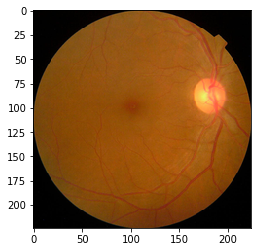

In [132]:
from matplotlib import pyplot as plt

plt.imshow(preprocess_img1(example))
plt.show()

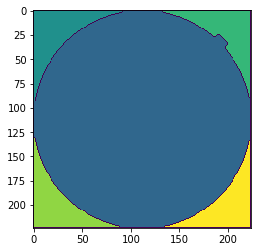

In [133]:
plt.imshow(preprocess_img2(example))
plt.show()

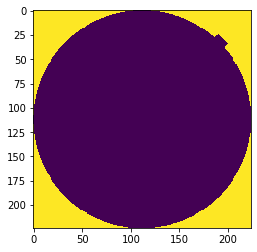

In [134]:
plt.imshow(preprocess_img3(example))
plt.show()

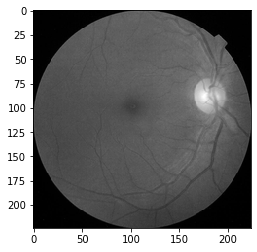

In [136]:
plt.imshow(preprocess_img4(example),cmap='gray' )
plt.show()

In [150]:
import numpy as np
from tqdm import tqdm
import os

IMG_SIZE= 224

target_names = ['0','1','2','3','4']


DIR = 'ctest_images_aug' #carpeta con los datos 

num_channels = 3 # canales, rgb, escala de grises

i = 0
j = 0
x = np.empty((1700, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.float32)
y = np.zeros((1700, 5), dtype=  np.float32)

# 

for names in target_names:
  newDir = DIR +'/'+ names
  for file in tqdm(os.listdir(newDir)):
    if str(file).endswith('json') != True:
        if str(file).startswith('.') != True:
            x[i,:,:,:3] = preprocess_img1(newDir+'/'+file) # filtro rgb
            y[i,j] = 1
            i = i+1
  j=j+1



  0%|          | 0/320 [00:00<?, ?it/s]

  1%|          | 2/320 [00:00<00:20, 15.64it/s]

  2%|▏         | 5/320 [00:00<00:17, 17.63it/s]

  2%|▎         | 8/320 [00:00<00:15, 19.92it/s]

  4%|▍         | 13/320 [00:00<00:12, 24.31it/s]

  6%|▌         | 19/320 [00:00<00:10, 28.46it/s]

  7%|▋         | 23/320 [00:00<00:10, 29.16it/s]

  8%|▊         | 27/320 [00:00<00:09, 31.20it/s]

 10%|█         | 32/320 [00:00<00:08, 35.06it/s]

 11%|█▏        | 36/320 [00:01<00:07, 35.69it/s]

 12%|█▎        | 40/320 [00:01<00:08, 31.90it/s]

 14%|█▍        | 44/320 [00:01<00:08, 33.51it/s]

 15%|█▌        | 49/320 [00:01<00:07, 36.92it/s]

 17%|█▋        | 54/320 [00:01<00:06, 39.48it/s]

 18%|█▊        | 59/320 [00:01<00:06, 40.54it/s]

 20%|██        | 64/320 [00:01<00:06, 42.59it/s]

 22%|██▏       | 71/320 [00:01<00:05, 48.25it/s]

 24%|██▍       | 77/320 [00:01<00:05, 48.33it/s]

 26%|██▌       | 83/320 [00:02<00:05, 43.39it/s]

 28%|██▊       | 88/320 [00:02<00:06, 36.93it/s]

 29%|██▉  

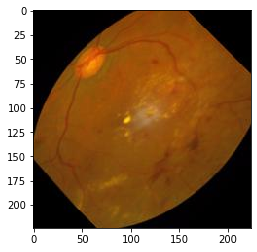

In [160]:
import matplotlib.pyplot as plt


plt.imshow(x[1599])
plt.show()

In [161]:
x=x[:1600]
y=y[:1600]

In [162]:

from numpy import save

from numpy import asarray
from numpy import save

data1 = asarray(x)
data2 = asarray(y)
save('x_test_ojos.npy', data1)
save('y_test_ojos.npy', data2)

california dataset

In [3]:
import pandas as pd

train_df = pd.read_csv('California Healthcare Foundation/trainLabels.csv')

In [4]:
train_df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [5]:
from tqdm import tqdm
import os

DIR = 'California Healthcare Foundation/train/train 2'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'California Healthcare Foundation/train/train-224' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG = 224  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['image'])):
    img = Image.open(DIR+'/'+image_id+'.jpeg')
    img= resize(img,IMG,IMG)  # Se puede cambiar el tamaño del resize
    img.save(DIR2+'/'+image_id+'.png')



 99%|█████████▉| 34714/35126 [7:38:05<02:35,  2.66it/s]   

OSError: cannot identify image file 'California Healthcare Foundation/train/train 2/43862_left.jpeg'